<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-правильности-расчета-эффективности-обогащения" data-toc-modified-id="Проверка-правильности-расчета-эффективности-обогащения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка правильности расчета эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Как-меняется-концентрация-металлов" data-toc-modified-id="Как-меняется-концентрация-металлов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Как меняется концентрация металлов</a></span></li><li><span><a href="#Распределения-размеров-гранул" data-toc-modified-id="Распределения-размеров-гранул-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределения размеров гранул</a></span></li><li><span><a href="#Cуммарная-концентрация-всех-веществ-на-разных-стадиях" data-toc-modified-id="Cуммарная-концентрация-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Cуммарная концентрация всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Данные содержат параметрами добычи и очистки. 
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Необходимо:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.


## Подготовка данных

In [1]:
#импортирование необходимых библиотек
import numpy as np
import pandas as pd

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.dummy import DummyRegressor
import seaborn as sns
import collections

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
train=pd.read_csv('/datasets/gold_recovery_train_new.csv',parse_dates = ['date']) #обучающая выборка
test=pd.read_csv('/datasets/gold_recovery_test_new.csv',parse_dates = ['date']) # тестовая выборка
full=pd.read_csv('/datasets/gold_recovery_full_new.csv',parse_dates = ['date']) # исходные данные

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null datetime64[ns]
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant     

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null datetime64[ns]
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
ro

In [5]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null datetime64[ns]
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant     

Везде есть пропуски, вероятно, из-за того, что данные измеряются позже.

###  Проверка правильности расчета эффективности обогащения

In [6]:
def calculate_recovery(C, F, T):
    
    rec = (C*(F-T)) / (F*(C-T)) * 100
    
    #мы не застрахованы от очень больших и очень маленьких значений
    rec[rec<0] = np.nan
    rec[rec>100] = np.nan
    
    return rec

In [7]:
recovery=train.dropna().reset_index()
rougher_output_recovery=recovery['rougher.output.recovery']
rougher_output_concentrate_au=recovery['rougher.output.concentrate_au']
rougher_input_feed_au=recovery['rougher.input.feed_au']
rougher_output_tail_au=recovery['rougher.output.tail_au']

In [8]:
recovery = calculate_recovery(rougher_output_concentrate_au,rougher_input_feed_au,rougher_output_tail_au)
recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
11012    89.574376
11013    87.724007
11014    88.890579
11015    89.858126
11016    89.514960
Length: 11017, dtype: float64

In [9]:
MAE(recovery,rougher_output_recovery)

9.739730529255835e-15

In [10]:
#пропуски
print("The number of nans in recovery: ", recovery.isna().sum())
print("The number of nans in rougher_output_recovery: ", rougher_output_recovery.isna().sum())

The number of nans in recovery:  0
The number of nans in rougher_output_recovery:  0


Пропусков нет. В целом, можно сказать, что значения посчитаны верно. Присутсвовали значения >100 и <0, из-за них возникали трудности.

### Анализ признаков, недоступных в тестовой выборке

In [11]:
step = collections.Counter()
type_step = collections.Counter()
data = collections.Counter()
list_columns = [i for i in train.columns if i not in test.columns]
for i in list_columns:
    words = list(map(str,i.split(".")))
    step[words[0]] += 1
    type_step[words[1]] += 1
    data[words[2]] += 1
    
    
list_columns

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Нашли все столбцы, которые есть в тренировочной выборке, но отсутствуют в тестовой: это все выходные признаки после различных технологических этапов. 

In [12]:
step,"\n",type_step,"\n",data

(Counter({'final': 9,
          'primary_cleaner': 8,
          'rougher': 13,
          'secondary_cleaner': 4}),
 '\n',
 Counter({'output': 30, 'calculation': 4}),
 '\n',
 Counter({'concentrate_ag': 3,
          'concentrate_pb': 3,
          'concentrate_sol': 3,
          'concentrate_au': 3,
          'recovery': 2,
          'tail_ag': 4,
          'tail_pb': 4,
          'tail_sol': 4,
          'tail_au': 4,
          'sulfate_to_au_concentrate': 1,
          'floatbank10_sulfate_to_au_feed': 1,
          'floatbank11_sulfate_to_au_feed': 1,
          'au_pb_ratio': 1}))

34 пропущенных признака: 30 - параметрам продукта, 4 - расчетные характеристики.  

К параметрам продукта относятся пропущенные признаки: **9 final**, **8 primary_cleaner**, **9 rougher**, **4 secondary_cleaner**.  

**4** пропущенных признака этапа **rougher** относятся к расчетным характеристикам.

На всех этапах нет информации о хвостовых частях; на всех этапах, кроме повторной очистки, отсутствует информация о доле металлов; для финального этапа и этапа флотации нет признаков обогащения; на этапе флотации отсутствуют данные о некоторых реагентах.

### Предобработка

In [13]:
full[full['final.output.concentrate_pb'].isna()].head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
2869,2016-06-08 17:59:59,NaN,NaN,10.188231,29.020814,63.725335,7.387115,2.072266,16.982505,2.908215,...,8.985634,-548.815307,7.011665,-537.231749,8.031238,-550.028193,5.984399,-549.63625,18.01224,-551.325271


Изначально была подсказка о том, что в соседних строках данные часто похожи. Данные индексируются датой и временем получения информации (date). Заполним пропуски последним действительным значением вперед.

In [14]:
full=full.fillna(method='ffill')
train=train.fillna(method='ffill')

In [15]:
train[train['final.output.concentrate_pb'].isna()].head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


In [16]:
full[full['final.output.concentrate_pb'].isna()].head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


Теперь данные готовы к дальнейшему анализу.

## Анализ данных

### Как меняется концентрация металлов 

Metal concentrate rougher input
Ag:8.79, Pb:3.59, Au:8.27



Text(0, 0.5, 'Friqency')

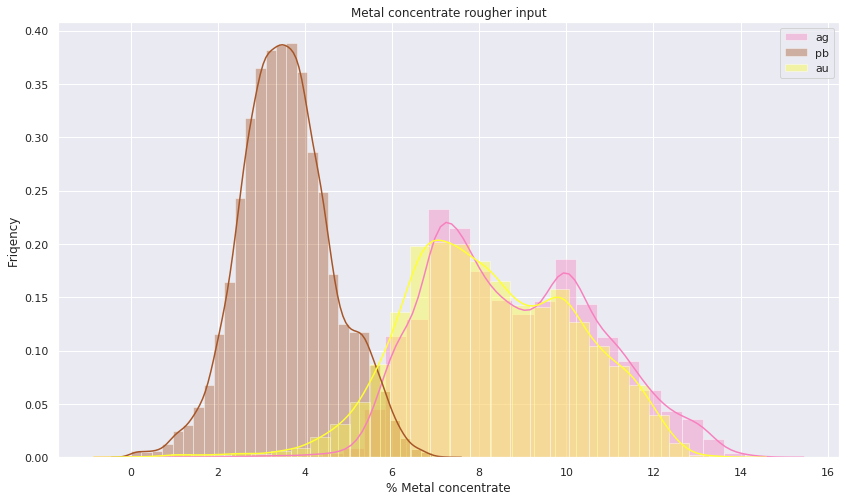

In [17]:
print("Metal concentrate rougher input")
print("Ag:{:0.2f}, Pb:{:0.2f}, Au:{:0.2f}".
format(full["rougher.input.feed_ag"].mean(),
full["rougher.input.feed_pb"].mean(),
full["rougher.input.feed_au"].mean()))
print()

plt.figure(figsize=(14,8))
sns.set(style = 'darkgrid', palette = 'Set1_r')
sns.distplot(full['rougher.input.feed_ag'],bins=30,label='ag')
sns.distplot(full['rougher.input.feed_pb'],bins=30,label='pb')
sns.distplot(full['rougher.input.feed_au'],bins=30,label='au')

plt.legend()
plt.title('Metal concentrate rougher input')
plt.xlabel("% Metal concentrate")
plt.ylabel("Friqency")

Metal concentrate rougher output
Ag:11.99, Pb:7.61, Au:19.77



Text(0, 0.5, 'Friqency')

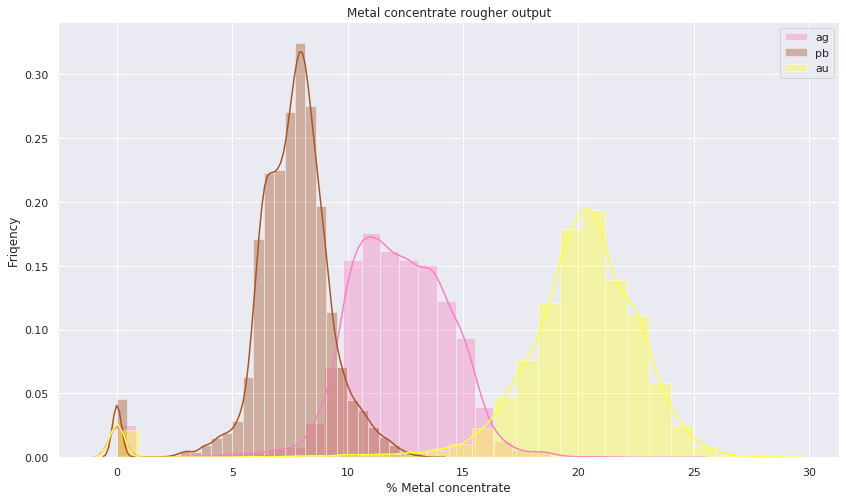

In [18]:
print("Metal concentrate rougher output")
print("Ag:{:0.2f}, Pb:{:0.2f}, Au:{:0.2f}".
format(full["rougher.output.concentrate_ag"].mean(),
full["rougher.output.concentrate_pb"].mean(),
full["rougher.output.concentrate_au"].mean()))
print()

plt.figure(figsize=(14,8))
sns.distplot(full['rougher.output.concentrate_ag'],bins=30,label='ag')
sns.distplot(full['rougher.output.concentrate_pb'],bins=30,label='pb')
sns.distplot(full['rougher.output.concentrate_au'],bins=30,label='au')

plt.legend()
plt.title('Metal concentrate rougher output')
plt.xlabel("% Metal concentrate")
plt.ylabel("Friqency")

Metal concentrate cleaner output
Ag:8.44, Pb:9.81, Au:32.12



Text(0, 0.5, 'Friqency')

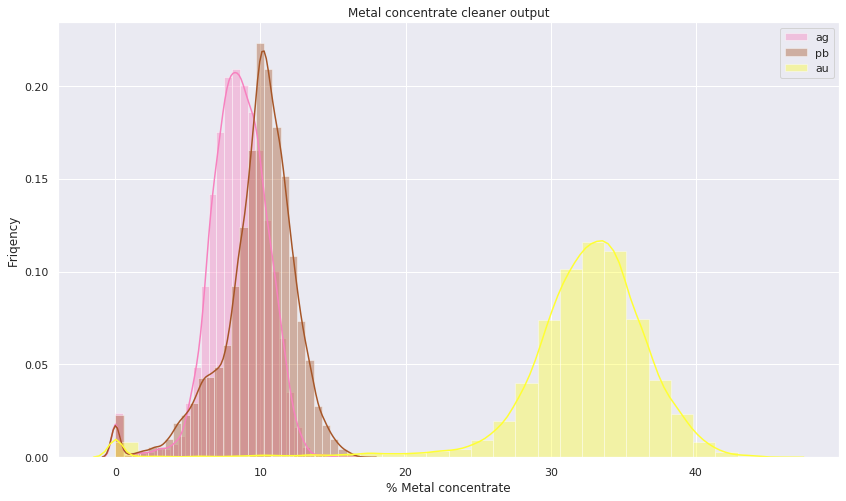

In [19]:
print("Metal concentrate cleaner output")
print("Ag:{:0.2f}, Pb:{:0.2f}, Au:{:0.2f}".
format(full["primary_cleaner.output.concentrate_ag"].mean(),
full["primary_cleaner.output.concentrate_pb"].mean(),
full["primary_cleaner.output.concentrate_au"].mean()))
print()

plt.figure(figsize=(14,8))
sns.distplot(full['primary_cleaner.output.concentrate_ag'],bins=30,label='ag')
sns.distplot(full['primary_cleaner.output.concentrate_pb'],bins=30,label='pb')
sns.distplot(full['primary_cleaner.output.concentrate_au'],bins=30,label='au')

plt.legend()
plt.title('Metal concentrate cleaner output')
plt.xlabel("% Metal concentrate")
plt.ylabel("Friqency")

Metal concentrate final output
Ag:5.17, Pb:9.98, Au:44.08



Text(0, 0.5, 'Friqency')

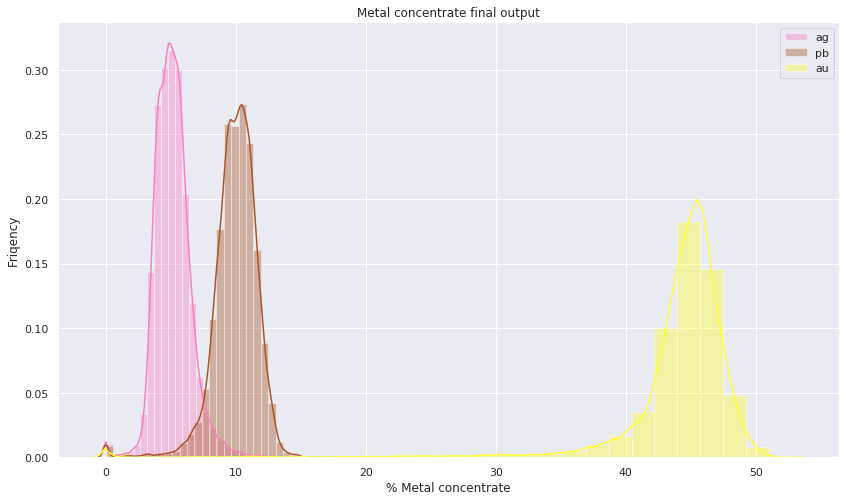

In [20]:
print("Metal concentrate final output")
print("Ag:{:0.2f}, Pb:{:0.2f}, Au:{:0.2f}".
format(full["final.output.concentrate_ag"].mean(),
full["final.output.concentrate_pb"].mean(),
full["final.output.concentrate_au"].mean()))
print()

plt.figure(figsize=(14,8))
sns.distplot(full['final.output.concentrate_ag'],bins=30,label='ag')
sns.distplot(full['final.output.concentrate_pb'],bins=30,label='pb')
sns.distplot(full['final.output.concentrate_au'],bins=30,label='au')

plt.legend()
plt.title('Metal concentrate final output')
plt.xlabel("% Metal concentrate")
plt.ylabel("Friqency")

По грфикам можно увидеть, что распределения поменялись после каждой процедуры обработки.   
Видно, что в процессе очистики, концентрация золота возрастает: среднее значение концентрации золота после первичной очистки было 32%; после финальной очистки значение средней концентрации золота стало 44%.   
Концентрация свинца тоже возрастает, но не так значительно.  
Среднее значение концентрации серебра уменьшается.  
Стоит отметим достаточно большое количетсво нулевых значений.  
Расперделение стало более концентрированным вокруг среднего по всем металлам.

### Распределения размеров гранул 

Text(0, 0.5, 'Frequency')

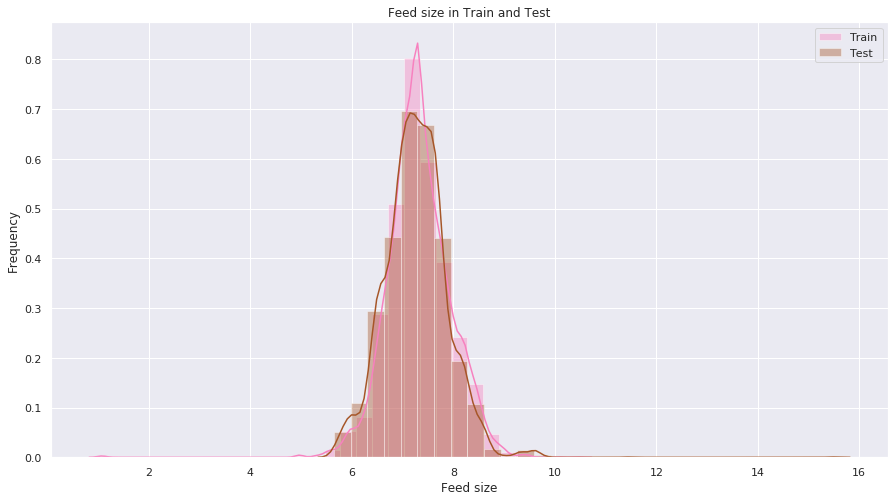

In [21]:
plt.figure(figsize=(15,8))
sns.distplot(train['primary_cleaner.input.feed_size'], bins = 30, label='Train')
sns.distplot(test['primary_cleaner.input.feed_size'],bins = 30, label='Test')


plt.legend()
plt.title('Feed size in Train and Test')
plt.xlabel('Feed size')
plt.ylabel('Frequency')

Судя по графику распределение обучающей и тестовой выборки можно сказать, что они совпадают. Тестовую выборку можно считать репрезентативной.

### Cуммарная концентрация всех веществ на разных стадиях

In [22]:
#концентрации металлов после флотации
full['sum_rougher_concentrate']=full['rougher.output.concentrate_ag']+\
full['rougher.output.concentrate_pb']+full['rougher.output.concentrate_sol']+full['rougher.output.concentrate_au']

train['sum_rougher_concentrate']=train['rougher.output.concentrate_ag']+\
train['rougher.output.concentrate_pb']+train['rougher.output.concentrate_sol']+train['rougher.output.concentrate_au']

#концентрации металлов после первичной очистки
full['sum_primary_cleaner_output_concentrate']=full['primary_cleaner.output.concentrate_ag']+\
full['primary_cleaner.output.concentrate_pb']+full['primary_cleaner.output.concentrate_sol']+\
full['primary_cleaner.output.concentrate_au']

train['sum_primary_cleaner_output_concentrate']=train['primary_cleaner.output.concentrate_ag']+\
train['primary_cleaner.output.concentrate_pb']+train['primary_cleaner.output.concentrate_sol']+\
train['primary_cleaner.output.concentrate_au']

#концентрации металлов после финальной очистки
full['sum_final_output_concentrate']=full['final.output.concentrate_ag']+\
full['final.output.concentrate_pb']+full['final.output.concentrate_sol']+full['final.output.concentrate_au']

train['sum_final_output_concentrate']=train['final.output.concentrate_ag']+\
train['final.output.concentrate_pb']+train['final.output.concentrate_sol']+train['final.output.concentrate_au']

In [23]:
sum_concentrate=['sum_concentrate_rougher','sum_primary_cleaner_output_concentrate','sum_final_output_concentrate']

Text(0, 0.5, 'Frequency')

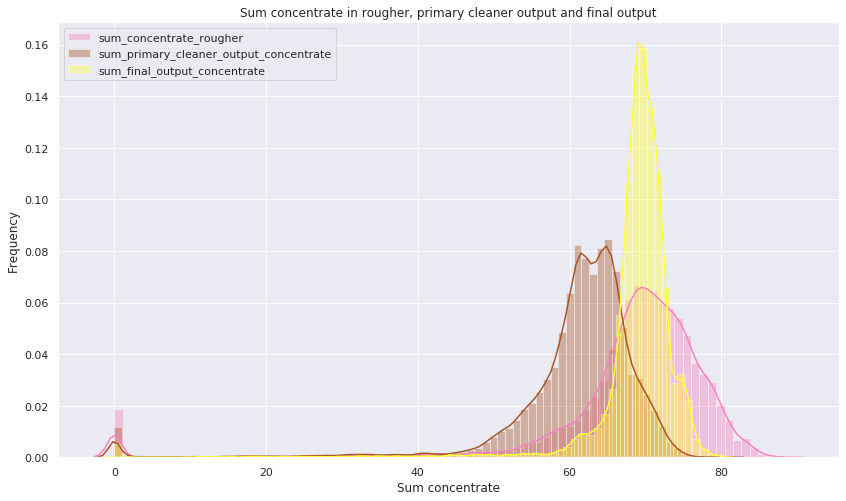

In [24]:
plt.figure(figsize=(14,8))
sns.distplot(full['sum_rougher_concentrate'],bins=80,label='sum_concentrate_rougher')
sns.distplot(full['sum_primary_cleaner_output_concentrate'],bins=80,label='sum_primary_cleaner_output_concentrate')
sns.distplot(full['sum_final_output_concentrate'],bins=80,label='sum_final_output_concentrate')

plt.legend()
plt.title('Sum concentrate in rougher, primary cleaner output and final output')
plt.xlabel("Sum concentrate")
plt.ylabel("Frequency")

По графику видно, что в датафрейме множество неинформативных значений в области до 40. Можно удалить их из исходных данных, а еще из обучающей выборки. 

In [25]:
full=full[full['sum_rougher_concentrate']>40]
full=full[full['sum_primary_cleaner_output_concentrate']>40]
full=full[full['sum_final_output_concentrate']>40]
full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,sum_rougher_concentrate,sum_primary_cleaner_output_concentrate,sum_final_output_concentrate
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,66.424950,72.640924,63.644396
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,67.012710,72.543485,63.957723
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,66.103793,72.095042,64.311180
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,65.752751,59.957723,63.573449
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,65.908382,71.321010,64.004667


Text(0, 0.5, 'Frequency')

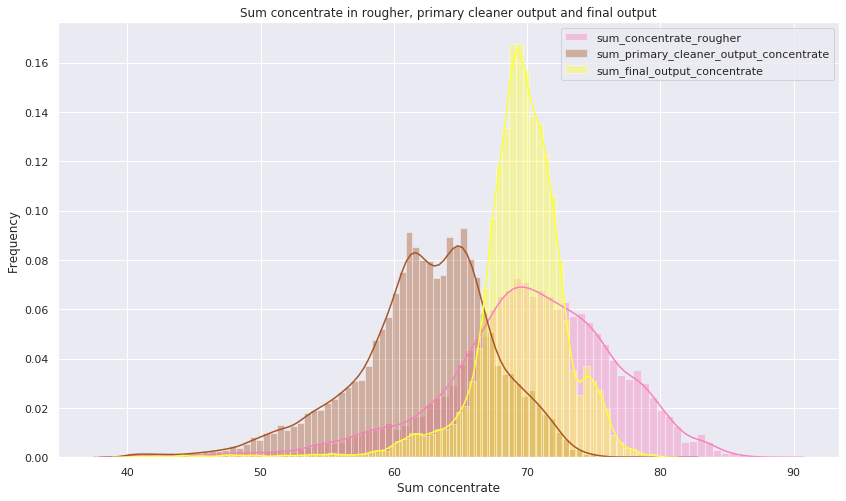

In [26]:
plt.figure(figsize=(14,8))
sns.distplot(full['sum_rougher_concentrate'],bins=80,label='sum_concentrate_rougher')
sns.distplot(full['sum_primary_cleaner_output_concentrate'],bins=80,label='sum_primary_cleaner_output_concentrate')
sns.distplot(full['sum_final_output_concentrate'],bins=80,label='sum_final_output_concentrate')

plt.legend()
plt.title('Sum concentrate in rougher, primary cleaner output and final output')
plt.xlabel("Sum concentrate")
plt.ylabel("Frequency")

In [27]:
train=train[train['sum_rougher_concentrate']>40]
train=train[train['sum_primary_cleaner_output_concentrate']>40]
train=train[train['sum_final_output_concentrate']>40]
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,sum_rougher_concentrate,sum_primary_cleaner_output_concentrate,sum_final_output_concentrate
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,66.424950,72.640924,63.644396
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,67.012710,72.543485,63.957723
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,66.103793,72.095042,64.311180
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,65.752751,59.957723,63.573449
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,65.908382,71.321010,64.004667


Text(0, 0.5, 'Frequency')

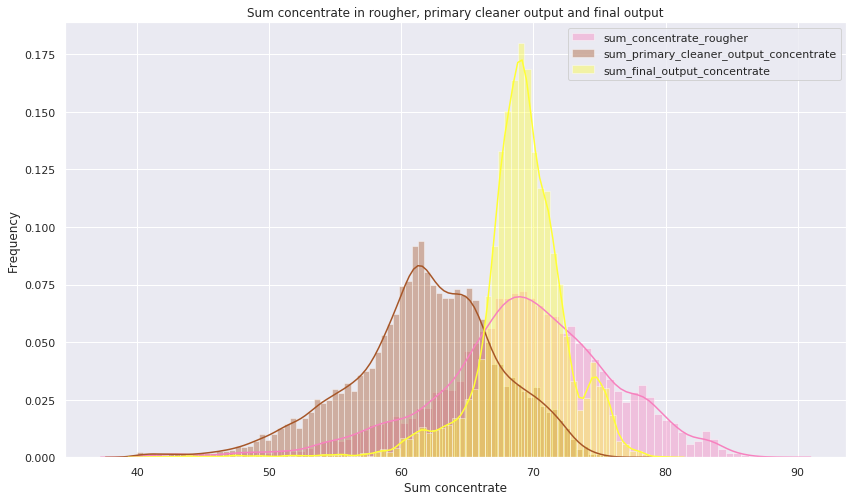

In [28]:
plt.figure(figsize=(14,8))
sns.distplot(train['sum_rougher_concentrate'],bins=80,label='sum_concentrate_rougher')
sns.distplot(train['sum_primary_cleaner_output_concentrate'],bins=80,label='sum_primary_cleaner_output_concentrate')
sns.distplot(train['sum_final_output_concentrate'],bins=80,label='sum_final_output_concentrate')

plt.legend()
plt.title('Sum concentrate in rougher, primary cleaner output and final output')
plt.xlabel("Sum concentrate")
plt.ylabel("Frequency")

Изучены:
- Концетрации основных веществ на разных этапах очистки.
- Размер гранул тестовой и обучающей выборки.
- Суммарная концентрация веществ.  

Аномалии удалены. Данные готовы к обучению.

## Модель

Для начала необходимо написать функцию расчета метрики sMAPE.

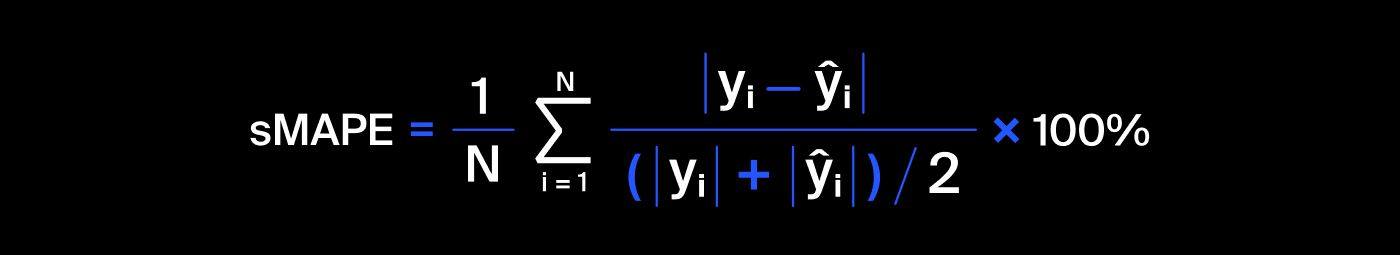

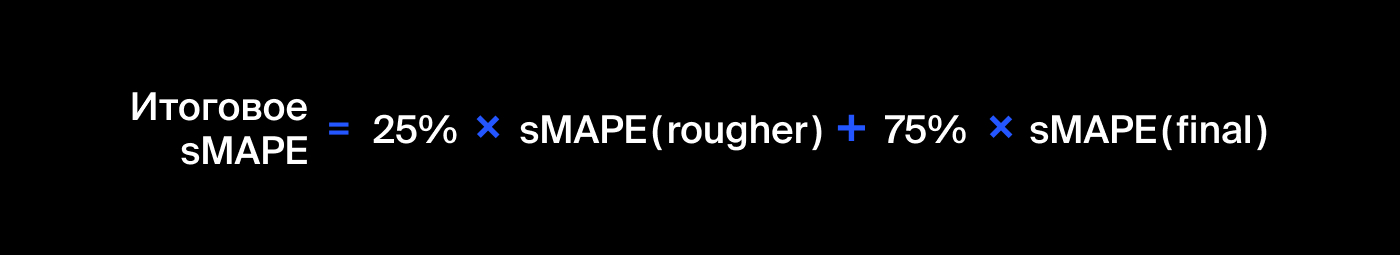

In [29]:
def sMAPE(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted):
    n = rougher_recovery_real.shape[0]
    
    rougher = ((2*abs(rougher_recovery_real - rougher_recovery_predicted)/
                     (abs(rougher_recovery_real) + abs(rougher_recovery_predicted))).sum() * 100 / n)
    final = ((2*abs(final_recovery_real - final_recovery_predicted)/
                     (abs(final_recovery_real) + abs(final_recovery_predicted))).sum() * 100 / n)
   

    return rougher * 0.25 + final * 0.75

In [30]:
train.dropna(subset=['rougher.output.concentrate_au', 'rougher.input.feed_au',
                                   'rougher.output.tail_au','rougher.output.recovery'], inplace=True)
good_test = test.dropna()
good_train = train.dropna()

Как уже было отмечено выше, в тестовой выборке отсуствует часть столбцов, связанная преимущественно с output. Это - онлайн метрики, т.к. данные будут получены по результатам технологического процесса.    

Остальные столбцы известны - офлайн метрики.  

Теперь необходимо в тестовой выборке выбрать столбцы, по котором модель будет обучаться. 
Столбец data сразу исключим. Для предсказания rougher output recovery будут использоватся данные из стобцов этапа rougher. Для вычисления final output recovery будут использованы все столбцы из тестовой выборки.

In [31]:
features_columns = good_test.columns[1:]

rougher_features_columns = set(features_columns[12:34])

final_features_columns = set(features_columns)

Подготовим разделение признаков для rougher output recovery и final output recovery.

In [32]:
#final.output.recovery
columns_to_delete = set(good_train.columns) - final_features_columns
print(columns_to_delete)
train_features_final = good_train.drop(columns_to_delete, axis=1)
print()
print(train_features_final.columns)
#вхождение feateures в столбцы тестовой выборки
print(set(train_features_final.columns) - set(test.columns))
print()

#rougher.output.recovery
columns_to_delete = set(train_features_final.columns) - rougher_features_columns
print(columns_to_delete)
train_features_rougher = train_features_final.drop(columns_to_delete, axis=1)
print()
print(train_features_rougher.columns)

{'final.output.tail_sol', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'final.output.concentrate_ag', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.tail_pb', 'rougher.output.recovery', 'rougher.output.concentrate_au', 'final.output.concentrate_au', 'rougher.calculation.sulfate_to_au_concentrate', 'sum_rougher_concentrate', 'secondary_cleaner.output.tail_ag', 'final.output.tail_ag', 'rougher.output.tail_au', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_ag', 'rougher.calculation.au_pb_ratio', 'sum_final_output_concentrate', 'rougher.output.concentrate_pb', 'rougher.output.tail_sol', 'primary_cleaner.output.tail_ag', 'rougher.output.concentrate_sol', 'secondary_cleaner.output.tail_sol', 'primary_cleaner.output.concentrate_au', 'rougher.output.tail_ag', 'final.output.tail_au', 'rougher.output.tail_pb', 'sum_primary_cleaner_output_concentrate', 'primary_cleaner.output.tail_au', 'rougher.output.co

Сформируем вектор целевых признаков.

In [33]:
train_target_final = good_train['final.output.recovery']
train_target_rougher = good_train['rougher.output.recovery']

Признаки тестовой выборки.

In [34]:
test_features = good_test.drop('date', axis=1)
test_features.columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

In [35]:
test_features_final = test_features
columns_to_delete = set(test_features_final.columns) - rougher_features_columns
test_features_rougher = test_features_final.drop(columns_to_delete, axis=1)

In [37]:
test_features_rougher.shape, train_features_rougher.shape

((5383, 22), (13132, 22))

In [36]:
#rougher_recovery_real = full.loc[test_features_rougher.index,'rougher.output.recovery']
#final_recovery_real = full.loc[test_features_final.index,'final.output.recovery']
#rougher_recovery_real.dropna(inplace=True)
#final_recovery_real.dropna(inplace=True)

Выберем несколько моделей для обучения:

- LinearRegression
- Ridge
- DecisionTreeRegressor

**LinearRegression**

In [38]:
%%time

regressor = LinearRegression()
print('Mean R2 from cross_val of LinearRegression =', cross_val_score(regressor,\
                                                               train_features_final, train_target_final, cv=5).mean())
print('Mean MAE from cross_val of LinearRegression =', cross_val_score(regressor,\
                                    train_features_final, train_target_final, cv=5, scoring='neg_mean_absolute_error').mean())

Mean R2 from cross_val of LinearRegression = -0.249765605824337
Mean MAE from cross_val of LinearRegression = -7.149328715735708
CPU times: user 1.66 s, sys: 1.55 s, total: 3.21 s
Wall time: 3.21 s


**Ridge**

In [39]:
%%time

from sklearn.linear_model import Ridge
regressor = Ridge()
hyperparams = [{'alpha':[0.1, 1, 10, 100], 'solver':['auto']},
                 {'alpha':[0.1, 1, 10, 100], 'solver':['svd']}, 
                 {'alpha':[0.1, 1, 10, 100], 'solver':['cholesky']},
                 {'alpha':[0.1, 1, 10, 100], 'solver':['lsqr']}, 
                 {'alpha':[0.1, 1, 10, 100], 'solver':['sparse_cg']}]


scores = ['r2', 'neg_mean_absolute_error']
for score in scores:
    print('Tuning hyper-parameters for %s' % score)
    print()
    clf = GridSearchCV(regressor, hyperparams, scoring=score)
    clf.fit(train_features_final, train_target_final)
    print("Best parameters set (development set):")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores (development set):")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    print()

Tuning hyper-parameters for r2

Best parameters set (development set):

{'alpha': 0.1, 'solver': 'sparse_cg'}

Grid scores (development set):

-0.529 (+/-1.161) for {'alpha': 0.1, 'solver': 'auto'}
-0.529 (+/-1.161) for {'alpha': 1, 'solver': 'auto'}
-0.526 (+/-1.157) for {'alpha': 10, 'solver': 'auto'}
-0.504 (+/-1.127) for {'alpha': 100, 'solver': 'auto'}
-0.529 (+/-1.161) for {'alpha': 0.1, 'solver': 'svd'}
-0.529 (+/-1.161) for {'alpha': 1, 'solver': 'svd'}
-0.526 (+/-1.157) for {'alpha': 10, 'solver': 'svd'}
-0.504 (+/-1.127) for {'alpha': 100, 'solver': 'svd'}
-0.529 (+/-1.161) for {'alpha': 0.1, 'solver': 'cholesky'}
-0.529 (+/-1.161) for {'alpha': 1, 'solver': 'cholesky'}
-0.526 (+/-1.157) for {'alpha': 10, 'solver': 'cholesky'}
-0.504 (+/-1.127) for {'alpha': 100, 'solver': 'cholesky'}
-0.508 (+/-0.877) for {'alpha': 0.1, 'solver': 'lsqr'}
-0.508 (+/-0.877) for {'alpha': 1, 'solver': 'lsqr'}
-0.508 (+/-0.877) for {'alpha': 10, 'solver': 'lsqr'}
-0.508 (+/-0.878) for {'alpha': 

**DecisionTreeRegressor**

In [39]:
%%time

regressor = DecisionTreeRegressor() 
max_depth_list = [x for x in range(2, 21, 2)]
hyperparams = [{'criterion':['mse'], 'max_depth':max_depth_list, 'random_state':[123456]},
               {'criterion':['mae'], 'max_depth':max_depth_list, 'random_state':[123456]}]

print('Tuning hyper-parameters')
print()
clf = GridSearchCV(regressor, hyperparams)
clf.fit(train_features_final, train_target_final)
print("Best parameters set (development set):")
print()
print(clf.best_params_)
print()
print("Grid scores (development set):")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
print()

Tuning hyper-parameters

Best parameters set (development set):

{'criterion': 'mse', 'max_depth': 2, 'random_state': 123456}

Grid scores (development set):

-0.069 (+/-0.138) for {'criterion': 'mse', 'max_depth': 2, 'random_state': 123456}
-0.299 (+/-0.854) for {'criterion': 'mse', 'max_depth': 4, 'random_state': 123456}
-0.213 (+/-0.378) for {'criterion': 'mse', 'max_depth': 6, 'random_state': 123456}
-0.705 (+/-0.751) for {'criterion': 'mse', 'max_depth': 8, 'random_state': 123456}
-0.740 (+/-0.382) for {'criterion': 'mse', 'max_depth': 10, 'random_state': 123456}
-1.035 (+/-0.047) for {'criterion': 'mse', 'max_depth': 12, 'random_state': 123456}
-1.570 (+/-1.013) for {'criterion': 'mse', 'max_depth': 14, 'random_state': 123456}
-1.676 (+/-1.144) for {'criterion': 'mse', 'max_depth': 16, 'random_state': 123456}
-1.390 (+/-0.680) for {'criterion': 'mse', 'max_depth': 18, 'random_state': 123456}
-1.267 (+/-0.421) for {'criterion': 'mse', 'max_depth': 20, 'random_state': 123456}
-0.20

Расчет sMAPE для всх моделей.

In [40]:
rougher_recovery_real = full.loc[test_features_rougher.index,'rougher.output.recovery']
final_recovery_real = full.loc[test_features_final.index,'final.output.recovery']

In [41]:
%%time

model = LinearRegression()
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для LinearRegression',sMAPE(rougher_recovery_real,\
                                         rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

model = Ridge(alpha=0.1, solver='sparse_cg')
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для Ridge',sMAPE(rougher_recovery_real,\
                              rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

model = DecisionTreeRegressor(criterion='mse', max_depth=2, random_state=123456)
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для DecisionTreeRegressor',sMAPE(rougher_recovery_real,\
                                              rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

sMAPE для LinearRegression 10.438668015873867
sMAPE для Ridge 10.559977867651359
sMAPE для DecisionTreeRegressor 10.06704402884801
CPU times: user 1.28 s, sys: 0 ns, total: 1.28 s
Wall time: 1.3 s


Создадим **константную** модель.

In [42]:
median_rougher_recovery = full['rougher.output.recovery'].median()
median_final_recovery = full['final.output.recovery'].median()

print('sMAPE константной модели', sMAPE(rougher_recovery_real,\
                                        median_rougher_recovery, final_recovery_real, median_final_recovery))

sMAPE константной модели 9.012132441596618


Проведем сокращение тестовой выборки из-за пропущенных значений rougher.output.recovery и final.output.recovery. Избавимся от NaN.

In [44]:
rougher_recovery_real.dropna(inplace=True)
final_recovery_real.dropna(inplace=True)
not_nan = set(test_features_rougher.index)
not_nan = not_nan.intersection(set(final_recovery_real.index), set(rougher_recovery_real.index))

rougher_recovery_real = full.loc[not_nan,'rougher.output.recovery']
final_recovery_real = full.loc[not_nan,'final.output.recovery']
test_features_rougher = test_features_rougher.loc[not_nan,:]
test_features_final = test_features_final.loc[not_nan,:]

In [45]:
%%time

model = LinearRegression()
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для LinearRegression',sMAPE(rougher_recovery_real,\
                                          rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

model = Ridge(alpha=0.1, solver='sparse_cg')
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для регресии Ridge',sMAPE(rougher_recovery_real,\
                                       rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

model = DecisionTreeRegressor(criterion='mse', max_depth=2, random_state=15062020)
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для DecisionTreeRegressor',sMAPE(rougher_recovery_real,\
                                              rougher_recovery_predicted, final_recovery_real, final_recovery_predicted)) 

print('sMAPE для медианной константной модели', sMAPE(rougher_recovery_real,\
                                                      median_rougher_recovery, final_recovery_real, median_final_recovery))

sMAPE для LinearRegression 10.947077718575693
sMAPE для регресии Ridge 11.074295901337868
sMAPE для DecisionTreeRegressor 10.557353985444877
sMAPE для медианной константной модели 9.451063497587102
CPU times: user 1.44 s, sys: 0 ns, total: 1.44 s
Wall time: 1.46 s


Сравним DecisionTreeRegressor, которая показала себя лучше всего c медианной константной моделью по метрикам R2 и MAE (на final recovery real).

In [47]:
model = DecisionTreeRegressor(criterion = 'mse', max_depth = 2, random_state = 123456)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('R2 DecisionTreeRegressor model =', r2_score(final_recovery_real, final_recovery_predicted))
print('MAE DecisionTreeRegressor model =', MAE(final_recovery_real, final_recovery_predicted))
print()

final_median_predict = pd.Series(median_final_recovery, index=not_nan)
print('R2 constant model =', r2_score(final_recovery_real, final_median_predict))
print('MAE constant model =', MAE(final_recovery_real, final_median_predict))

R2 DecisionTreeRegressor model = -0.46549350326436256
MAE DecisionTreeRegressor model = 7.10026124966836

R2 constant model = -0.15082433459715738
MAE constant model = 6.026722164014383


**Вывод**

На данном этапе создана функция sMAPE. 
Предложено несколько моделей: LinearRegression, Ridge, DecisionTreeRegressor. К каждой модели применены методы: кросс-валидации и автоматического подбора параметров GridSearchCV.

Наилучшим образом себя показала модель DecisionTreeRegressor - значение sMAPE самое низкое.

## Вывод


В ходе работы выполнены следующие шаги:
- подготовка данных  
- исследовательский анализ данных  
- построение и обучение модели  

Изначально отсутствует 34 признака в тестовой выборке. 

Параметр recovery в тренировочной выборке был рассчитан верно.    

Одним из сложнейших моментов данного проекта является скорость прохождения кросс-валидации с поиском лучших гиперпараметров.

Модель DecisionTreeRegressor оказалась лучшей из всех. Параметры алгоритма: {criterion = 'mse', max_depth = 2, random_state = 123456}. sMAPE составил 10.5573. Однако, при сравнении с константной моделью значение немного проигрывает.   
sMAPE для всех моделей чуть выше до удаления пропущенных значений. 


## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [х]  Весь код выполняется без ошибок
- [х]  Ячейки с кодом расположены в порядке выполнения
- [х]  Выполнен шаг 1: данные подготовлены
    - [х]  Проверена формула вычисления эффективности обогащения
    - [х]  Проанализированы признаки, недоступные в тестовой выборке
    - [х]  Проведена предобработка данных
- [х]  Выполнен шаг 2: данные проанализированы
    - [х]  Исследовано изменение концентрации элементов на каждом этапе
    - [х]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [х]  Исследованы суммарные концентрации
    - [х]  Проанализированы и обработаны аномальные значения
- [х]  Выполнен шаг 3: построена модель прогнозирования
    - [х]  Написана функция для вычисления итогового *sMAPE*
    - [х]  Обучено и проверено несколько моделей
    - [х]  Выбрана лучшая модель, её качество проверено на тестовой выборке